# 이 코드는 이미지의 증강을 확인하기 위한 코드입니다.
## tensorflow.keras.preprocessing.image의 ImageDataGenerator를 사용하였습니다.
## 현재 사용된 옵션은 밝기 조정, 회전, 줌, 가로, 세로 조정, 정도를 사용하였습니다.

In [5]:
import os
import numpy as np
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import matplotlib.pyplot as plt
np.random.seed(42)
random.seed(42)
class generator():
    def __init__(self, initial_path, save_path):
        self.save_path = save_path            
        self.initial_path = initial_path

        # Data generator
        self.datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        brightness_range=[0.8,1.2], # brightness control
        rotation_range=5,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.05, # Randomly zoom image 
        width_shift_range=0.05,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.05,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    def data_generator(self, epochs):
        image_list = os.listdir(self.initial_path)
        epoch = 0
        while epoch < epochs:
            image = random.choice(image_list)
            image_path = os.path.join(self.initial_path, image)
            img = cv2.imread(image_path, cv2.IMREAD_COLOR)
            X=[]
            X.append(np.array(img))
            X = np.array(X)
            self.datagen.fit(X)
            augmented_images = self.datagen.flow(X, batch_size=1)
            image_save_path = os.path.join(self.save_path, '{}.png'.format(epoch))
            self.generated_images = next(augmented_images)
            cv2.imwrite(image_save_path, self.generated_images[0])
            # del self.generated_images
            epoch += 1

# 객체 생성
initial_path = '../cleandata/(4)/sealed'
# initial_path = 'fail2'
save_path = './'
GEN = generator(initial_path, save_path)
GEN.data_generator(10) #image 개수

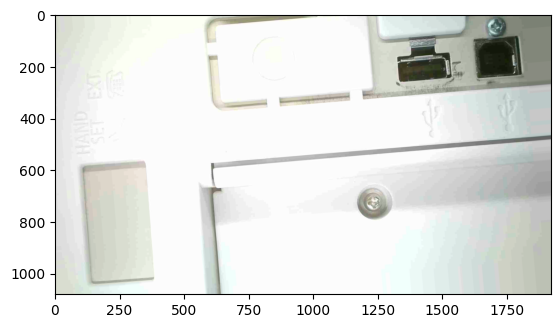

In [16]:
plt.imshow(GEN.generated_images[0] / GEN.generated_images[0].max())
plt.show()